## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market.
We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

In [1545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [1546]:
df= pd.read_csv(r'C:\Users\Rajesh\Desktop\main\Rajesh\Data Science\Advance regression Assignment\Advance Regression Assignment.csv')

In [1547]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Observation:
1. There are 81 feature in this data set.
2. Target variable is price
3. Some columns are null. We need to apply EDA to clean up the data.
4. Some column are order category so we need to use label encoder and then scale.
5. some column are not as order category so we need to use dummies (One-Hot encoding)
6. Some column datatype need to changes too.
7. Need to check outlier and missing values.
8. Looke like we should have variance across columns too if they have any releationship.



In [1548]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1549]:
df.shape

(1460, 81)

In [1550]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Observation
1. Looks at the max and 50%, for some of columns 50% is not good as per his correspodning max like for carheight,boreratio etc..
2. Mean is looks good for all columns apart from few which we need to check for correlation.
3. 25% and 75% also looks good. So some columns data have been spread out and some columns we might have good linear relationship.


In [1551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Observation:
1. At this moment not sure if i have to do for derived columns
2. Looks like most of the column are not null so hopefully columns does not have NAN but will have to check.
3. At this moment all columns have good datatype but need to check once correlataion started

In [1552]:
df.isna().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [1553]:
df.isnull().sum(axis = 1)

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

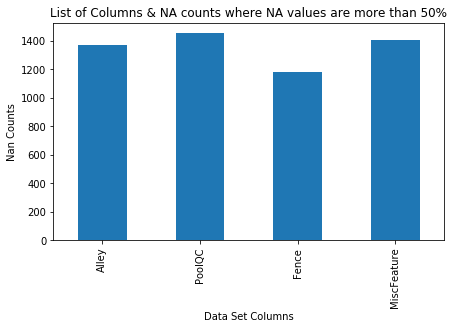

In [1554]:
# List of Columns where NAN values are more than 50% as standard

nan_col = df.isnull().sum()
nan_col = nan_col[nan_col.values >(0.5*len(df))]
plt.figure(figsize=(7,4))
nan_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.xlabel("Data Set Columns")
plt.ylabel("Nan Counts")
plt.show()

Shape before removing columns where NA value more than 50%.
(1460, 81)
Shape after removing columns where NA value more than 50%.
(1460, 77)


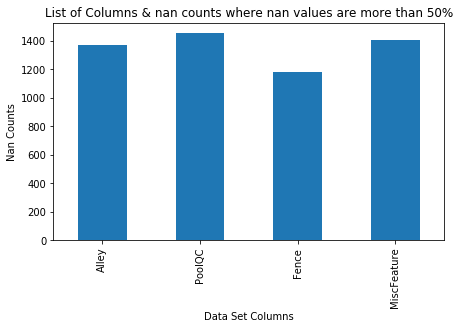

In [1555]:
##### Data Cleaning and Manipulation
# Remove columns where nan value more than 50% as standard 

print ("Shape before removing columns where NA value more than 50%.")
print (df.shape)
df.dropna(thresh = 0.5*len(df), axis = 1, inplace = True)
print ("Shape after removing columns where NA value more than 50%.")
print (df.shape)
plt.figure(figsize=(7,4))
nan_col.plot(kind='bar')
plt.title('List of Columns & nan counts where nan values are more than 50%')
plt.xlabel("Data Set Columns")
plt.ylabel("Nan Counts")
plt.show()


In [1556]:
# Remove rows where NA values are more than or equal to 30%
print ("Shape before removing rows where NA value more than 30%.")
print (df.shape)
print ("Shape after removing rows where NA value more than 30%.")
df.dropna(thresh = 0.2*len(df), axis = 0)
print (df.shape)


Shape before removing rows where NA value more than 30%.
(1460, 77)
Shape after removing rows where NA value more than 30%.
(1460, 77)


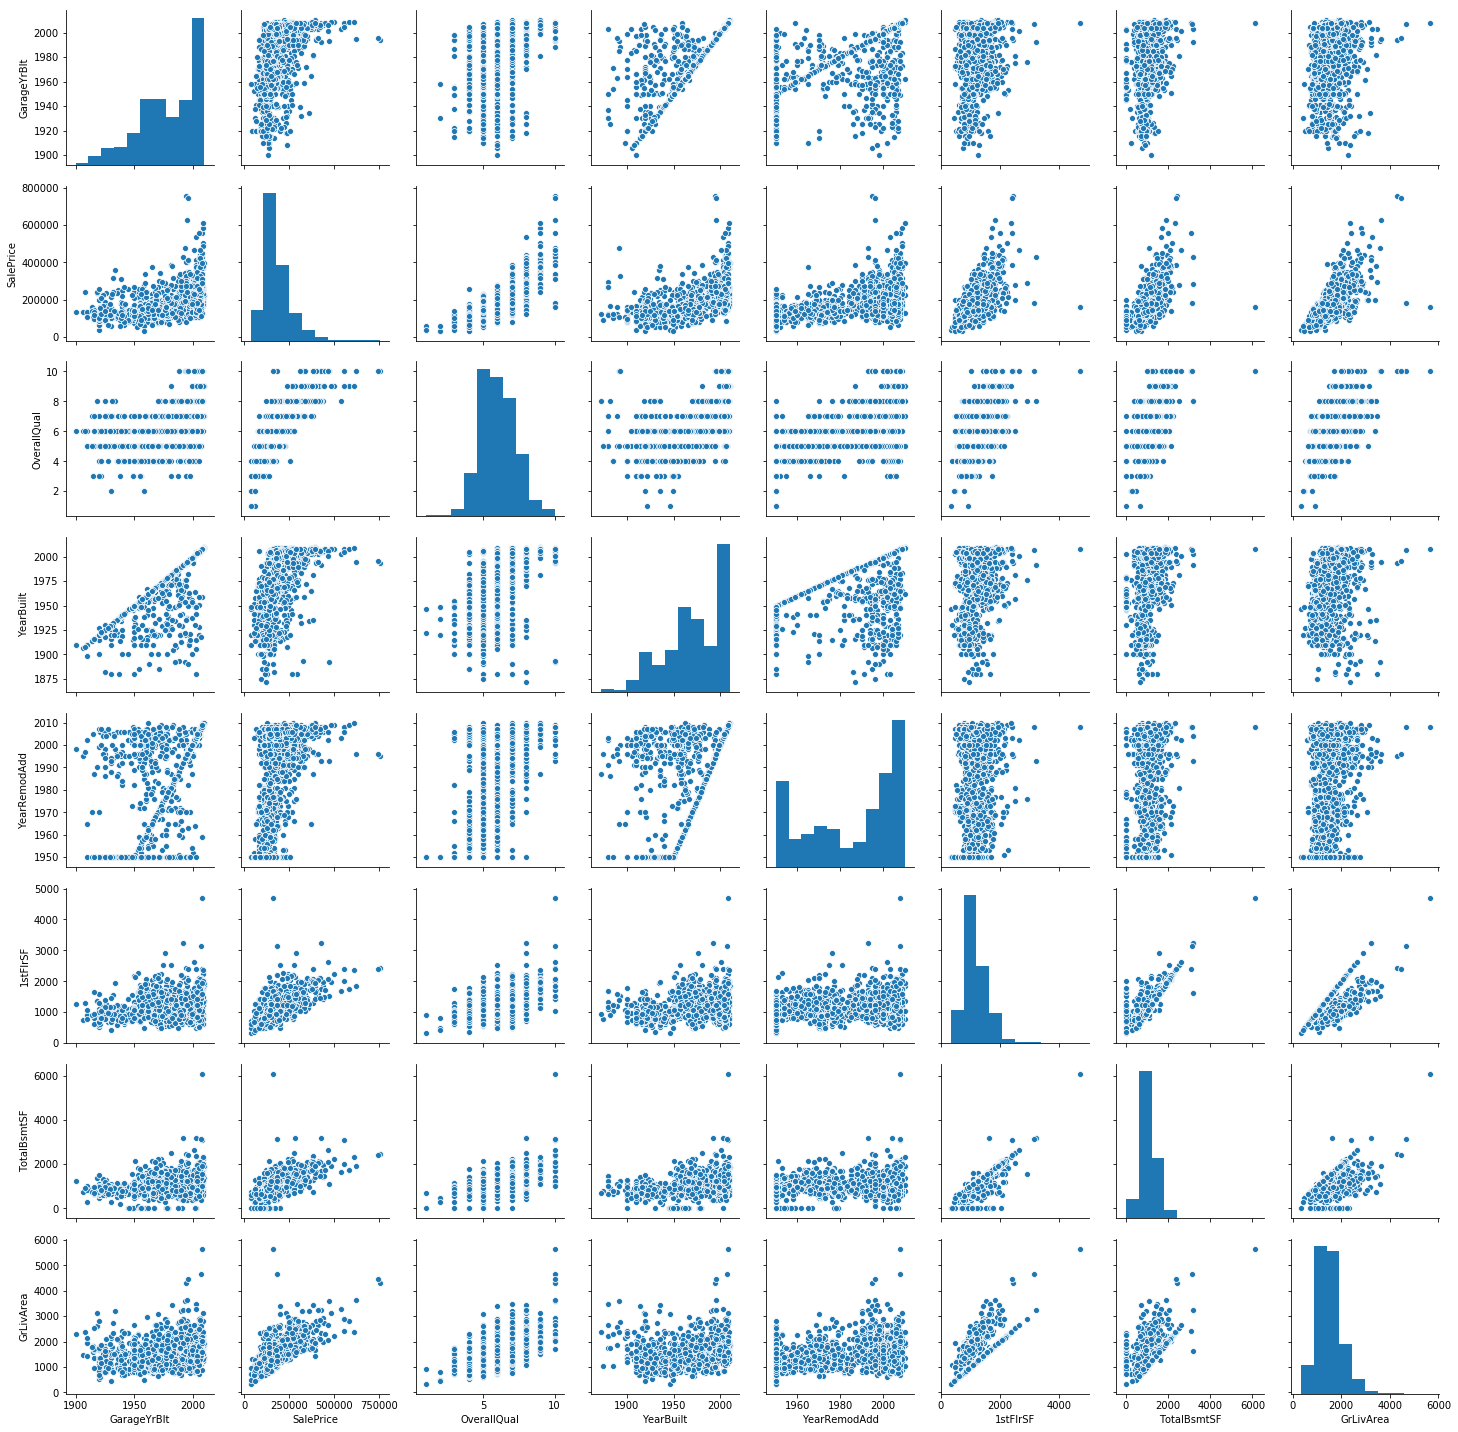

In [1557]:
# Visualising numeric variables.

sns.pairplot(df,vars = ['GarageYrBlt','SalePrice','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','TotalBsmtSF','GrLivArea'])
plt.show()

from above figure it seems:
1. Some variable are highly correlated to each other but not that much for which we need to remove.
2. some variable are highly correlated with price
3. there are some outlier but that is not much big so not sure if we remove what would be the impact.

<function matplotlib.pyplot.show(*args, **kw)>

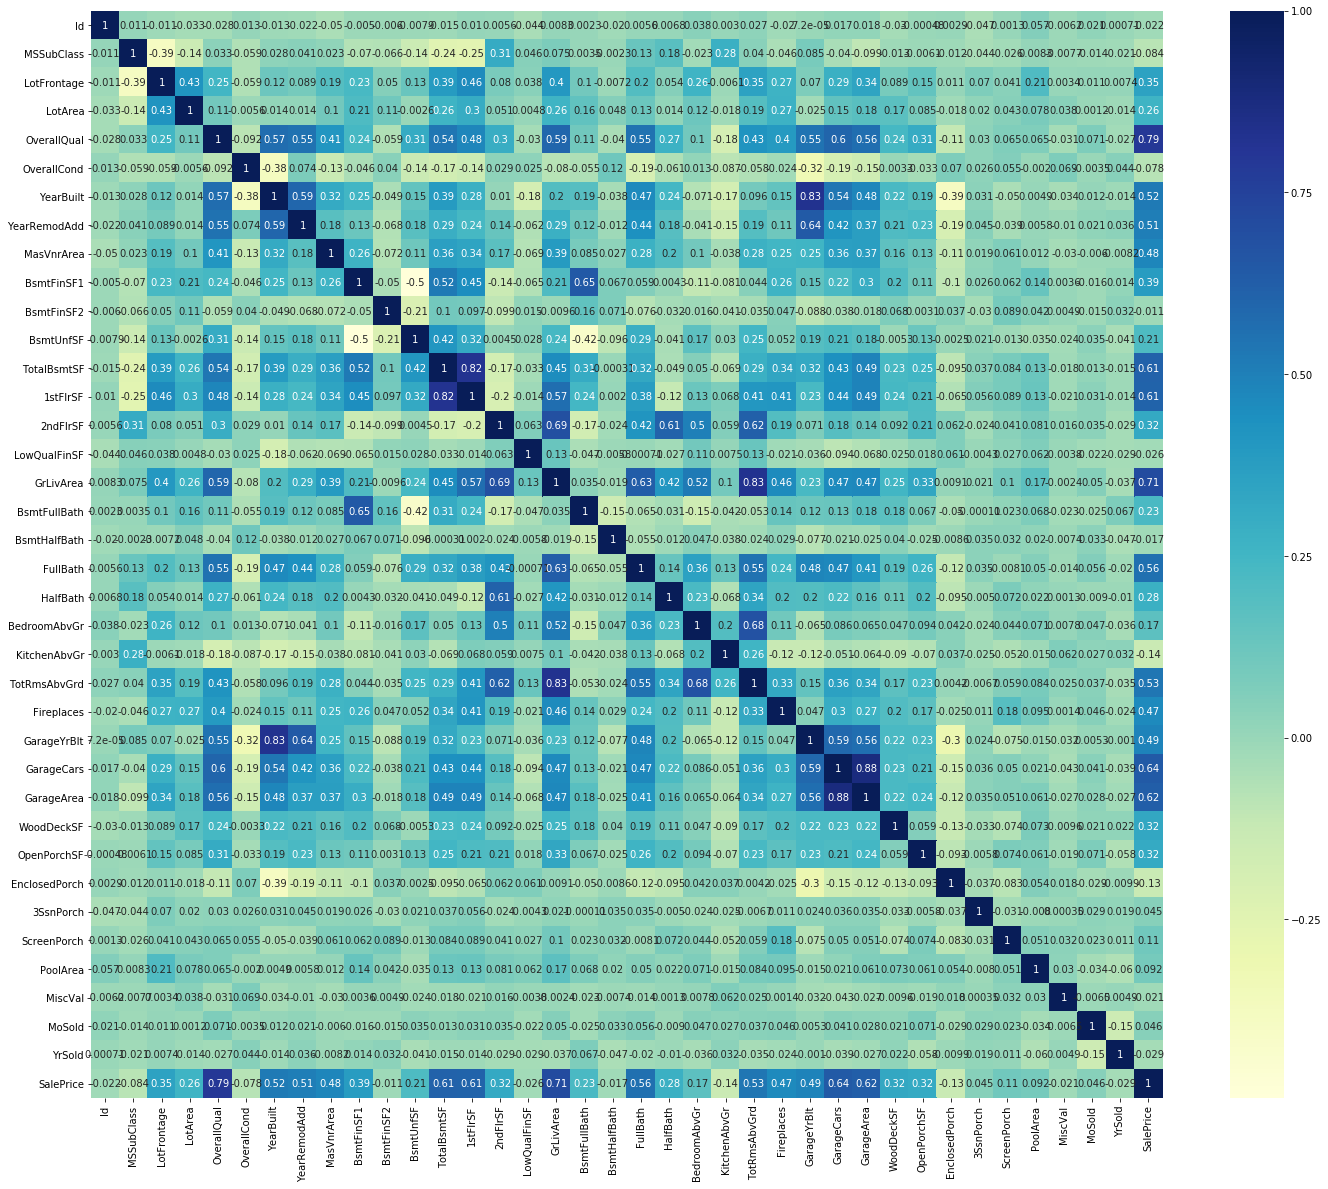

In [1225]:
# Finding correlation

plt.figure(figsize = (24,20))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')
plt.show

From above correation graph:
1. just few variable are correlated with price.
2. none of the variable are correlated to each other.

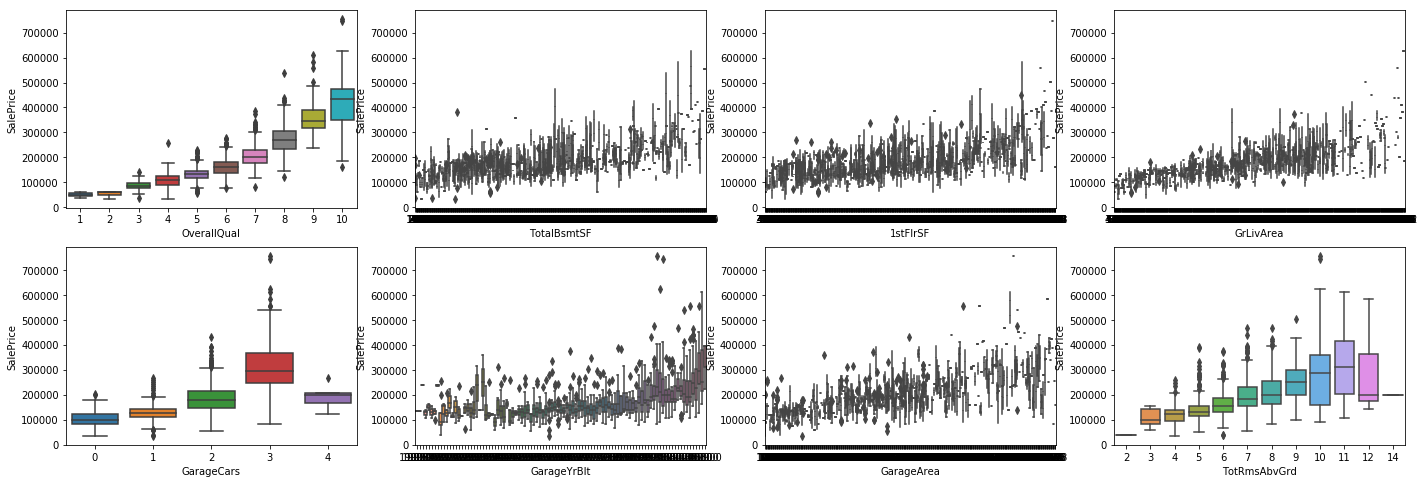

In [1558]:
# Visualising categorical variables

plt.figure(figsize=(24,8))

plt.subplot(2,4,1)
sns.boxplot(x='OverallQual',y='SalePrice',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='TotalBsmtSF',y='SalePrice',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='1stFlrSF',y='SalePrice',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='GrLivArea',y='SalePrice',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='GarageCars',y='SalePrice',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='GarageYrBlt',y='SalePrice',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='GarageArea',y='SalePrice',data=df)
plt.subplot(2,4,8)
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df)


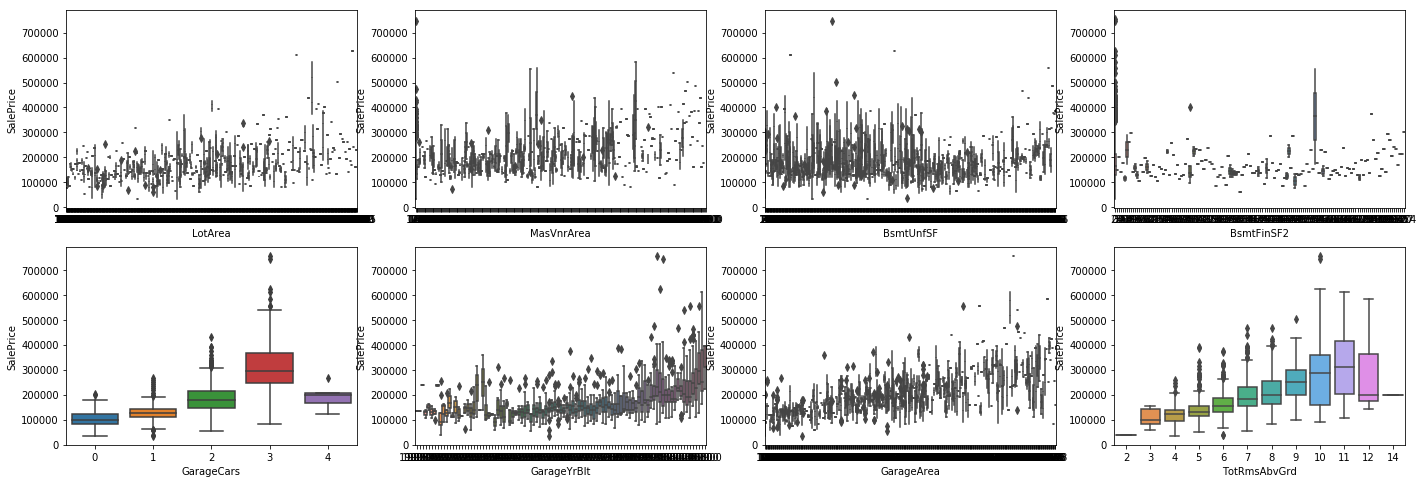

In [1559]:
# Visualising numeric variables

plt.figure(figsize=(24,8))

plt.subplot(2,4,1)
sns.boxplot(x='LotArea',y='SalePrice',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='MasVnrArea',y='SalePrice',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='BsmtUnfSF',y='SalePrice',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='BsmtFinSF2',y='SalePrice',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='GarageCars',y='SalePrice',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='GarageYrBlt',y='SalePrice',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='GarageArea',y='SalePrice',data=df)
plt.subplot(2,4,8)
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df)

1. From above it seems we do have some outlire but it an extream point so not sure if we need to remove.
2. Saleprice is more impactable to with for above variables.
3. OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageYrBlt,GarageArea and TotRmsAbvGrd

In [1560]:
MS = pd.get_dummies(df['MSZoning'],drop_first = True)
df = pd.concat([df,MS],axis=1)
df.drop(['MSZoning'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FV,RH,RL,RM
0,1,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,0,0,1,0
1,2,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0,0,1,0
2,3,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,0,0,1,0
3,4,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,0,0,1,0
4,5,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,0,0,1,0


In [1561]:
ST = pd.get_dummies(df['Street'],drop_first = True)
df = pd.concat([df,ST],axis=1)
df.drop(['Street'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FV,RH,RL,RM,Pave
0,1,60,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,2008,WD,Normal,208500,0,0,1,0,1
1,2,20,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,5,2007,WD,Normal,181500,0,0,1,0,1
2,3,60,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,9,2008,WD,Normal,223500,0,0,1,0,1
3,4,70,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,2,2006,WD,Abnorml,140000,0,0,1,0,1
4,5,60,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,12,2008,WD,Normal,250000,0,0,1,0,1


In [1562]:
LO = pd.get_dummies(df['LotShape'],drop_first = True)
df = pd.concat([df,LO],axis=1)
df.drop(['LotShape'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleCondition,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg
0,1,60,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Normal,208500,0,0,1,0,1,0,0,1
1,2,20,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Normal,181500,0,0,1,0,1,0,0,1
2,3,60,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Normal,223500,0,0,1,0,1,0,0,0
3,4,70,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Abnorml,140000,0,0,1,0,1,0,0,0
4,5,60,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Normal,250000,0,0,1,0,1,0,0,0


In [1563]:
LA = pd.get_dummies(df['LandContour'],drop_first = True)
df = pd.concat([df,LA],axis=1)
df.drop(['LandContour'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl
0,1,60,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,1,0,1,0,0,1,0,0,1
1,2,20,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,1,0,1,0,0,1,0,0,1
2,3,60,68.0,11250,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,1,0,1,0,0,0,0,0,1
3,4,70,60.0,9550,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,1,0,1,0,0,0,0,0,1
4,5,60,84.0,14260,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,0,1,0,1,0,0,0,0,0,1


In [1564]:
UT = pd.get_dummies(df['Utilities'],drop_first = True)
df = pd.concat([df,UT],axis=1)
df.drop(['Utilities'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa
0,1,60,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,1,0,0,1,0,0,1,0
1,2,20,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,1,0,1,0,0,1,0,0,1,0
2,3,60,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,1,0,0,0,0,0,1,0
3,4,70,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,1,0,1,0,0,0,0,0,1,0
4,5,60,84.0,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,1,0,1,0,0,0,0,0,1,0


In [1565]:
LOT = pd.get_dummies(df['LotConfig'],drop_first = True)
df = pd.concat([df,LOT],axis=1)
df.drop(['LotConfig'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside
0,1,60,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0,1,0,0,1,0,0,1,0,0
2,3,60,68.0,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,1
3,4,70,60.0,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,0,0,0,0,1,0,0,1,0,0


In [1566]:
LAN = pd.get_dummies(df['LandSlope'],drop_first = True)
df = pd.concat([df,LAN],axis=1)
df.drop(['LandSlope'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev
0,1,60,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,1,0,0,0,0,1,0,0
1,2,20,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,1,0,0,1,0,0,0,0
2,3,60,68.0,11250,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,1,0,0,0,0,1,0,0
3,4,70,60.0,9550,Crawfor,Norm,Norm,1Fam,2Story,7,...,0,0,1,0,0,0,0,0,0,0
4,5,60,84.0,14260,NoRidge,Norm,Norm,1Fam,2Story,8,...,0,0,1,0,0,1,0,0,0,0


In [1567]:
NEI = pd.get_dummies(df['Neighborhood'],drop_first = True)
df = pd.concat([df,NEI],axis=1)
df.drop(['Neighborhood'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,65.0,8450,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,Norm,Norm,1Fam,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [1568]:
COND = pd.get_dummies(df['Condition1'],drop_first = True)
df = pd.concat([df,COND],axis=1)
df.drop(['Condition1'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,1,60,65.0,8450,Norm,1Fam,2Story,7,5,2003,...,0,0,0,1,0,0,0,0,0,0
1,2,20,80.0,9600,Norm,1Fam,1Story,6,8,1976,...,0,1,1,0,0,0,0,0,0,0
2,3,60,68.0,11250,Norm,1Fam,2Story,7,5,2001,...,0,0,0,1,0,0,0,0,0,0
3,4,70,60.0,9550,Norm,1Fam,2Story,7,5,1915,...,0,0,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,Norm,1Fam,2Story,8,5,2000,...,0,0,0,1,0,0,0,0,0,0


In [1569]:
COND1 = pd.get_dummies(df['Condition2'],drop_first = True)
df = pd.concat([df,COND1],axis=1)
df.drop(['Condition2'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,RRAn,RRNe,RRNn,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,1,60,65.0,8450,1Fam,2Story,7,5,2003,2003,...,0,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,1Fam,1Story,6,8,1976,1976,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,1Fam,2Story,7,5,2001,2002,...,0,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,1Fam,2Story,7,5,1915,1970,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,1Fam,2Story,8,5,2000,2000,...,0,0,0,0,1,0,0,0,0,0


In [1570]:
BLDG = pd.get_dummies(df['BldgType'],drop_first = True)
df = pd.concat([df,BLDG],axis=1)
df.drop(['BldgType'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE
0,1,60,65.0,8450,2Story,7,5,2003,2003,Gable,...,1,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,1Story,6,8,1976,1976,Gable,...,1,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,2Story,7,5,2001,2002,Gable,...,1,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,2Story,7,5,1915,1970,Gable,...,1,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,2Story,8,5,2000,2000,Gable,...,1,0,0,0,0,0,0,0,0,0


In [1571]:
HOUS = pd.get_dummies(df['HouseStyle'],drop_first = True)
df = pd.concat([df,HOUS],axis=1)
df.drop(['HouseStyle'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,1,60,65.0,8450,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0


In [1572]:
ROOF = pd.get_dummies(df['RoofStyle'],drop_first = True)
df = pd.concat([df,ROOF],axis=1)
df.drop(['RoofStyle'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed
0,1,60,65.0,8450,7,5,2003,2003,CompShg,VinylSd,...,0,0,1,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,MetalSd,...,0,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,VinylSd,...,0,0,1,0,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,Wd Sdng,...,0,0,1,0,0,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,VinylSd,...,0,0,1,0,0,1,0,0,0,0


In [1573]:
EXTR = pd.get_dummies(df['Exterior1st'],drop_first = True)
df = pd.concat([df,EXTR],axis=1)
df.drop(['Exterior1st'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior2nd,...,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,1,60,65.0,8450,7,5,2003,2003,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,MetalSd,...,0,0,0,1,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [1574]:
EXTR1 = pd.get_dummies(df['Exterior2nd'],drop_first = True)
df = pd.concat([df,EXTR1],axis=1)
df.drop(['Exterior2nd'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrType,...,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
0,1,60,65.0,8450,7,5,2003,2003,CompShg,BrkFace,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,None,...,0,0,1,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,BrkFace,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,None,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,BrkFace,...,0,0,0,0,0,0,0,1,0,0


In [1575]:
MAS = pd.get_dummies(df['MasVnrType'],drop_first = True)
df = pd.concat([df,MAS],axis=1)
df.drop(['MasVnrType'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,1,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,0,0,1,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,1,0,0,1,0,0


In [1576]:
EXTR = pd.get_dummies(df['ExterQual'],drop_first = True)
df = pd.concat([df,EXTR],axis=1)
df.drop(['ExterQual'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,1,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,1,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,1,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,1,0,0,1,0,0,0,1,0


In [1577]:
EXTER = pd.get_dummies(df['ExterCond'],drop_first = True)
df = pd.concat([df,EXTER],axis=1)
df.drop(['ExterCond'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,BrkFace,None,Stone,Fa,Gd,TA,Fa,Gd,Po,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,0,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,1,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,0,0,0,1,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,1,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,0,0,0,1,0,0,0,0,1


In [1578]:
F = pd.get_dummies(df['Foundation'],drop_first = True)
df = pd.concat([df,F],axis=1)
df.drop(['Foundation'], axis = 1,inplace=True)
df.head()
#Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,TA,Fa,Gd,Po,TA,CBlock,PConc,Slab,Stone,Wood
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,1,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,1,0,0,0,1,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,1,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,1,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,1,0,1,0,0,0


In [1579]:
BSMT = pd.get_dummies(df['BsmtQual'],drop_first = True)
df = pd.concat([df,BSMT],axis=1)
df.drop(['BsmtQual'], axis = 1,inplace=True)
df.head()
#Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Po,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,1,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,1,1,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,1,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,1,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,1,0,1,0,0,0,0,1,0


In [1580]:
BSMT1 = pd.get_dummies(df['BsmtCond'],drop_first = True)
df = pd.concat([df,BSMT1],axis=1)
df.drop(['BsmtCond'], axis = 1,inplace=True)
df.head()
#Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,PConc,Slab,Stone,Wood,Fa,Gd,TA,Gd,Po,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,0,0,0,0,1,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,0,0,1,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,0,0,0,0,1,0,0,0,1


In [1581]:
BSMT11 = pd.get_dummies(df['BsmtExposure'],drop_first = True)
df = pd.concat([df,BSMT11],axis=1)
df.drop(['BsmtExposure'], axis = 1,inplace=True)
df.head()
#Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Wood,Fa,Gd,TA,Gd,Po,TA,Gd,Mn,No
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,1,0,0,0,1,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,1,0,0,0,1,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,1,0,0,0,1,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,1,1,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,1,0,0,0,1,0,0,0


In [1582]:
BSMT111 = pd.get_dummies(df['BsmtFinType1'],drop_first = True)
df = pd.concat([df,BSMT111],axis=1)
df.drop(['BsmtFinType1'], axis = 1,inplace=True)
df.head()
#Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,1,0,0,1,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,1,1,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,1,0,1,0,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,1,0,0,0,0,1,0,0,0


In [1583]:
B11 = pd.get_dummies(df['BsmtFinType2'],drop_first = True)
df = pd.concat([df,B11],axis=1)
df.drop(['BsmtFinType2'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,1,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,1,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,1,0,0,0,0,0,0,0,1


In [1584]:
B112 = pd.get_dummies(df['Heating'],drop_first = True)
df = pd.concat([df,B112],axis=1)
df.drop(['Heating'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,1,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,1,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,1,1,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,1,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,1,1,0,0,0,0


In [1585]:
B121 = pd.get_dummies(df['HeatingQC'],drop_first = True)
df = pd.concat([df,B121],axis=1)
df.drop(['HeatingQC'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Unf,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,1,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,1,1,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,1,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,1,1,0,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,1,0,0,0,0,0,0,0,0


In [1586]:
AIR = pd.get_dummies(df['CentralAir'],drop_first = True)
df = pd.concat([df,AIR],axis=1)
df.drop(['CentralAir'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,GasA,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,1,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,1,0,0,0,0,0,1,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,0,0,0,0,0,0,0,0,1


In [1587]:
AIR1 = pd.get_dummies(df['Electrical'],drop_first = True)
df = pd.concat([df,AIR1],axis=1)
df.drop(['Electrical'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,0,1,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,1,0,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,0,1,0,0,0,1


In [1588]:
AIR11 = pd.get_dummies(df['KitchenQual'],drop_first = True)
df = pd.concat([df,AIR11],axis=1)
df.drop(['KitchenQual'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,1,0,0,0,1,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,1,0,0,0,1,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,1,0,0,0,1,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,1,0,0,0,1,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,1,0,0,0,1,0,1,0


In [1589]:
A11 = pd.get_dummies(df['Functional'],drop_first = True)
df = pd.concat([df,A11],axis=1)
df.drop(['Functional'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,0,1,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,1,0,0,1,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,0,1,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,1,0,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,0,1,0,0,0,0,0,0,1


In [1590]:
A12 = pd.get_dummies(df['FireplaceQu'],drop_first = True)
df = pd.concat([df,A12],axis=1)
df.drop(['FireplaceQu'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,0,1,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,0,1,0,0,0,1


In [1591]:
GARA = pd.get_dummies(df['GarageType'],drop_first = True)
df = pd.concat([df,GARA],axis=1)
df.drop(['GarageType'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,1,0,0,0,1,1,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,0,0,0,1,1,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,1,0,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,0,0,0,1,1,0,0,0,0


In [1592]:
GARAGE1 = pd.get_dummies(df['GarageFinish'],drop_first = True)
df = pd.concat([df,GARAGE1],axis=1)
df.drop(['GarageFinish'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,1,0,0,0,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,1,1,0,0,0,0,1,0


In [1593]:
GARAGE11 = pd.get_dummies(df['GarageQual'],drop_first = True)
df = pd.concat([df,GARAGE11],axis=1)
df.drop(['GarageQual'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,1,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,1,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,1,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,1,0,0,0,0,1


In [1594]:
GARAGE111 = pd.get_dummies(df['GarageCond'],drop_first = True)
df = pd.concat([df,GARAGE111],axis=1)
df.drop(['GarageCond'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,1,0,0,0,0,1,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,1,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,1,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,1,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,1,0,0,0,0,1,0,0,0,1


In [1595]:
PAVA = pd.get_dummies(df['PavedDrive'],drop_first = True)
df = pd.concat([df,PAVA],axis=1)
df.drop(['PavedDrive'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,1,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,1,0,0,0,1,0,1


In [1596]:
POOL = pd.get_dummies(df['SaleType'],drop_first = True)
df = pd.concat([df,POOL],axis=1)
df.drop(['SaleType'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,1,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,1,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,1,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,1,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,1,0,0,0,0,0,0,0,1


In [1597]:
POOL1 = pd.get_dummies(df['SaleCondition'],drop_first = True)
df = pd.concat([df,POOL1],axis=1)
df.drop(['SaleCondition'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,CompShg,196.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,CompShg,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,CompShg,162.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,CompShg,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,CompShg,350.0,...,0,0,0,0,1,0,0,0,1,0


In [1598]:
POOL1122 = pd.get_dummies(df['RoofMatl'],drop_first = True)
df = pd.concat([df,POOL1122],axis=1)
df.drop(['RoofMatl'], axis = 1,inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Family,Normal,Partial,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,0,1,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,0,1,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,1,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,1,0,0,0,0,0,0


In [1599]:
df.shape

(1460, 238)

In [1600]:
df2 = df.loc[:,~df.columns.duplicated()]

In [1601]:
df2.shape

(1460, 178)

In [1602]:
## use interpolate to impute null values
df1 = df2.interpolate()

In [1603]:
df1.shape

(1460, 178)

In [1604]:
list(df1.columns) 

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'IR2',
 'IR3',
 'Reg',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Mod',
 'Sev',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Feedr',
 'N

In [1605]:
df1.isna().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    0
1436    0
1437    0
1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
Length: 1460, dtype: int64

## we can use for VIF but let's use RFE first

In [1606]:
df_train,df_test = train_test_split(df1, train_size = 0.7, random_state =100)
print(df_train.shape)
print(df_test.shape)
df_train.head()


(1021, 178)
(439, 178)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Family,Normal,Partial,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
318,319,60,90.0,9900,7,5,1993,1993,256.0,987,...,0,1,0,1,0,0,0,0,0,0
239,240,50,52.0,8741,6,4,1945,1950,0.0,94,...,0,1,0,1,0,0,0,0,0,0
986,987,50,59.0,5310,6,8,1910,2003,0.0,0,...,0,1,0,1,0,0,0,0,0,0
1416,1417,190,60.0,11340,4,6,1885,1950,0.0,0,...,0,1,0,1,0,0,0,0,0,0
390,391,50,50.0,8405,5,8,1900,1950,0.0,241,...,0,1,0,1,0,0,0,0,0,0


## Rescaling feature
## What do you mean by rescaling and why it is important.
How do we rescale:
1. Min-Max scaling (normalisation) : between 0 and 1
2. standardzation (mean 0, sigma -1)
3. normiliasation : x -xmin/xmax - xmin
4. stanardzation : x -mean (mu)/sigma (sd)


In [1607]:
scaler = MinMaxScaler()

# Create list of numeric variable
num_vars = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath'
           ,'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF'
           ,'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

#2. Fit the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Family,Normal,Partial,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
318,319,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,...,0,1,0,1,0,0,0,0,0,0
239,240,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,...,0,1,0,1,0,0,0,0,0,0
986,987,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,...,0,1,0,1,0,0,0,0,0,0
1416,1417,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,...,0,1,0,1,0,0,0,0,0,0
390,391,0.176471,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00,0.042700,...,0,1,0,1,0,0,0,0,0,0


## Training the Model

In [1608]:
# X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1609]:
y_train.head()

318     0.312595
239     0.108457
986     0.114012
1416    0.121650
390     0.116789
Name: SalePrice, dtype: float64

## Add a Constant

In [1610]:
X_train_sm = sm.add_constant(X_train)

## Create First Model

In [1611]:
# Create first model
lr = sm.OLS(y_train,X_train_sm)

In [1612]:
lr_model = lr.fit()

In [1613]:
#params
lr_model.params

const          -1.290448
Id              0.000001
MSSubClass     -0.037846
LotFrontage     0.017304
LotArea         0.112063
OverallQual     0.100022
OverallCond     0.060597
YearBuilt       0.066272
YearRemodAdd    0.007722
MasVnrArea      0.030052
BsmtFinSF1      0.156170
BsmtFinSF2      0.009259
BsmtUnfSF       0.003295
TotalBsmtSF     0.147753
1stFlrSF        0.145869
2ndFlrSF        0.146018
LowQualFinSF   -0.014839
GrLivArea       0.193930
BsmtFullBath    0.017086
BsmtHalfBath   -0.001574
FullBath       -0.000409
HalfBath       -0.005778
BedroomAbvGr   -0.048421
KitchenAbvGr   -0.048959
TotRmsAbvGrd    0.022168
Fireplaces      0.020940
GarageYrBlt     0.000095
GarageCars      0.029193
GarageArea      0.021788
WoodDeckSF      0.011420
                  ...   
Min1            0.019712
Min2            0.025672
Typ             0.034731
Attchd         -0.014213
Basment        -0.011942
BuiltIn        -0.028815
CarPort        -0.020176
Detchd         -0.015014
RFn            -0.008418


In [1614]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     52.21
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:21:30   Log-Likelihood:                 2054.3
No. Observations:                1021   AIC:                            -3765.
Df Residuals:                     849   BIC:                            -2917.
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2904      0.221     -5.852      0.000      -1.723      -0.858
Id             1.234e-06   2.86e-06      0.431      0.667   -4.39e-06    6.85e-06
MSSubClass       -0.0378      0.026     -1.430      0.153      -0.090       0.014
LotFrontage       0.0173      0.022      0.791      0.429      -0.026       0.060
LotArea           0.1121      0.040      2.775      0.006       0.033       0.191
OverallQual       0.1000      0.017      5.973      0.000       0.067       0.133
OverallCond       0.0606      0.013      4.783      0.000       0.036       0.085
YearBuilt         0.0663      0.018      3.676      0.000       0.031       0.102
YearRemodAdd      0.0077      0.006      1.304      0.193      -0.004       0.019
MasVnrArea        0.0301      0.016      1.877      0.061      -0.001       0.061
BsmtFinSF1        0.1562      0.023      6.789      0.000       0.111       0.201
BsmtFinSF2        0.0093      0.013      0.734      0.463      -0.015       0.034
BsmtUnfSF         0.0033      0.011      0.296      0.767      -0.019       0.025
TotalBsmtSF       0.1478      0.023      6.290      0.000       0.102       0.194
1stFlrSF          0.1459      0.025      5.888      0.000       0.097       0.194
2ndFlrSF          0.1460      0.019      7.579      0.000       0.108       0.184
LowQualFinSF     -0.0148      0.016     -0.907      0.365      -0.047       0.017
GrLivArea         0.1939      0.020      9.847      0.000       0.155       0.233
BsmtFullBath      0.0171      0.011      1.626      0.104      -0.004       0.038
BsmtHalfBath     -0.0016      0.011     -0.142      0.887      -0.023       0.020
FullBath         -0.0004      0.012     -0.034      0.973      -0.024       0.023
HalfBath         -0.0058      0.008     -0.739      0.460      -0.021       0.010
BedroomAbvGr     -0.0484      0.021     -2.360      0.018      -0.089      -0.008
KitchenAbvGr     -0.0490      0.022     -2.237      0.026      -0.092      -0.006
TotRmsAbvGrd      0.0222      0.020      1.127      0.260      -0.016       0.061
Fireplaces        0.0209      0.008      2.781      0.006       0.006       0.036
GarageYrBlt     9.47e-05      0.000      0.916      0.360      -0.000       0.000
GarageCars        0.0292      0.017      1.684      0.093      -0.005       0.063
GarageArea        0.0218      0.021      1.025      0.306      -0.020       0.064
WoodDeckSF        0.0114      0.009      1.235      0.217      -0.007       0.030
OpenPorchSF       0.0058      0.011      0.525      0.599      -0.016       0.027
EnclosedPorch     0.0006      0.012      0.051      0.960      -0.024       0.025
3SsnPorch         0.0374      0.020      1.906      0.057      -0.001       0.076
ScreenPorch       0.0129      0.009      1.408      0.159      -0.005       0.031
PoolArea          0.1103      0.026      4.181   

## Analysis from above stats.
1. If you go in that way certainly you will reach a certain point where you can see a good model.2.
2. This is time cunsuming and but combersion process.
3. Loak at the r2 values it is more than 81% and adjusted R2 is %81 which is nearly same as R2
4. Look at the p valus its almost 0
5. as per adjusted R2 and p values, we can conclude that it might be a good model down the time when we keep adding independent variable but again its a length process.
6. So we have to to take all variable and drop one by one based on VIF and P value.

## Second approach with VIF
What is VIF:

VIF will measure how much the variance of an estimated regression coefficient increases if your predictors are correlated.

1. if VIF or variation is low then its not good for model.
2. if if VIF or variation is low then its good for model and the model is realible.
3. We will take all variable and then drop one by based on VIF and P values.

In [1615]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Family,Normal,Partial,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
318,319,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,...,0,1,0,1,0,0,0,0,0,0
239,240,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,...,0,1,0,1,0,0,0,0,0,0
986,987,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,...,0,1,0,1,0,0,0,0,0,0
1416,1417,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,...,0,1,0,1,0,0,0,0,0,0
390,391,0.176471,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00,0.042700,...,0,1,0,1,0,0,0,0,0,0


In [1616]:
# build model with all variable

X_train_sm = sm.add_constant(X_train)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const          -1.290448
Id              0.000001
MSSubClass     -0.037846
LotFrontage     0.017304
LotArea         0.112063
OverallQual     0.100022
OverallCond     0.060597
YearBuilt       0.066272
YearRemodAdd    0.007722
MasVnrArea      0.030052
BsmtFinSF1      0.156170
BsmtFinSF2      0.009259
BsmtUnfSF       0.003295
TotalBsmtSF     0.147753
1stFlrSF        0.145869
2ndFlrSF        0.146018
LowQualFinSF   -0.014839
GrLivArea       0.193930
BsmtFullBath    0.017086
BsmtHalfBath   -0.001574
FullBath       -0.000409
HalfBath       -0.005778
BedroomAbvGr   -0.048421
KitchenAbvGr   -0.048959
TotRmsAbvGrd    0.022168
Fireplaces      0.020940
GarageYrBlt     0.000095
GarageCars      0.029193
GarageArea      0.021788
WoodDeckSF      0.011420
                  ...   
Min1            0.019712
Min2            0.025672
Typ             0.034731
Attchd         -0.014213
Basment        -0.011942
BuiltIn        -0.028815
CarPort        -0.020176
Detchd         -0.015014
RFn            -0.008418


In [1617]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     52.21
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:21:31   Log-Likelihood:                 2054.3
No. Observations:                1021   AIC:                            -3765.
Df Residuals:                     849   BIC:                            -2917.
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2904      0.221     -5.852      0.000      -1.723      -0.858
Id             1.234e-06   2.86e-06      0.431      0.667   -4.39e-06    6.85e-06
MSSubClass       -0.0378      0.026     -1.430      0.153      -0.090       0.014
LotFrontage       0.0173      0.022      0.791      0.429      -0.026       0.060
LotArea           0.1121      0.040      2.775      0.006       0.033       0.191
OverallQual       0.1000      0.017      5.973      0.000       0.067       0.133
OverallCond       0.0606      0.013      4.783      0.000       0.036       0.085
YearBuilt         0.0663      0.018      3.676      0.000       0.031       0.102
YearRemodAdd      0.0077      0.006      1.304      0.193      -0.004       0.019
MasVnrArea        0.0301      0.016      1.877      0.061      -0.001       0.061
BsmtFinSF1        0.1562      0.023      6.789      0.000       0.111       0.201
BsmtFinSF2        0.0093      0.013      0.734      0.463      -0.015       0.034
BsmtUnfSF         0.0033      0.011      0.296      0.767      -0.019       0.025
TotalBsmtSF       0.1478      0.023      6.290      0.000       0.102       0.194
1stFlrSF          0.1459      0.025      5.888      0.000       0.097       0.194
2ndFlrSF          0.1460      0.019      7.579      0.000       0.108       0.184
LowQualFinSF     -0.0148      0.016     -0.907      0.365      -0.047       0.017
GrLivArea         0.1939      0.020      9.847      0.000       0.155       0.233
BsmtFullBath      0.0171      0.011      1.626      0.104      -0.004       0.038
BsmtHalfBath     -0.0016      0.011     -0.142      0.887      -0.023       0.020
FullBath         -0.0004      0.012     -0.034      0.973      -0.024       0.023
HalfBath         -0.0058      0.008     -0.739      0.460      -0.021       0.010
BedroomAbvGr     -0.0484      0.021     -2.360      0.018      -0.089      -0.008
KitchenAbvGr     -0.0490      0.022     -2.237      0.026      -0.092      -0.006
TotRmsAbvGrd      0.0222      0.020      1.127      0.260      -0.016       0.061
Fireplaces        0.0209      0.008      2.781      0.006       0.006       0.036
GarageYrBlt     9.47e-05      0.000      0.916      0.360      -0.000       0.000
GarageCars        0.0292      0.017      1.684      0.093      -0.005       0.063
GarageArea        0.0218      0.021      1.025      0.306      -0.020       0.064
WoodDeckSF        0.0114      0.009      1.235      0.217      -0.007       0.030
OpenPorchSF       0.0058      0.011      0.525      0.599      -0.016       0.027
EnclosedPorch     0.0006      0.012      0.051      0.960      -0.024       0.025
3SsnPorch         0.0374      0.020      1.906      0.057      -0.001       0.076
ScreenPorch       0.0129      0.009      1.408      0.159      -0.005       0.031
PoolArea          0.1103      0.026      4.181   

In [1618]:
# Create a dataframe that will contain the names of the all the features variables and there resopective labels

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
12,TotalBsmtSF,inf
169,Partial,inf
162,New,inf
9,BsmtFinSF1,inf
10,BsmtFinSF2,inf
11,BsmtUnfSF,inf
16,GrLivArea,13125974.92
13,1stFlrSF,7177933.56
14,2ndFlrSF,2783775.42
15,LowQualFinSF,21338.90


In [1619]:
# Some VIF value are infinite and NAN so we need to drop first.

X = X_train.drop(['GrLivArea','Fa','TA','LowQualFinSF','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','Gd'],axis=1)

## Test Condition and remove:

    High p value , high VIP : remove it
    High low
        High p , low VIF : remove first
        Low P, high VIF : remove after above one
    Low p, low VIF : Keep it



In [1620]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     39.20
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          7.96e-307
Time:                        23:21:42   Log-Likelihood:                 1893.4
No. Observations:                1021   AIC:                            -3461.
Df Residuals:                     858   BIC:                            -2657.
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8516      0.252     -3.377      0.001      -1.347      -0.357
Id             1.865e-06   3.32e-06      0.562      0.574   -4.65e-06    8.38e-06
MSSubClass       -0.0240      0.031     -0.782      0.435      -0.084       0.036
LotFrontage       0.0490      0.025      1.940      0.053      -0.001       0.099
LotArea           0.1299      0.046      2.821      0.005       0.040       0.220
OverallQual       0.1871      0.018     10.285      0.000       0.151       0.223
OverallCond       0.0588      0.015      4.021      0.000       0.030       0.087
YearBuilt         0.0527      0.021      2.554      0.011       0.012       0.093
YearRemodAdd      0.0094      0.007      1.387      0.166      -0.004       0.023
MasVnrArea        0.0945      0.018      5.243      0.000       0.059       0.130
BsmtFullBath      0.0485      0.011      4.531      0.000       0.027       0.069
BsmtHalfBath      0.0119      0.013      0.943      0.346      -0.013       0.037
FullBath          0.0622      0.013      4.769      0.000       0.037       0.088
HalfBath          0.0244      0.009      2.796      0.005       0.007       0.042
BedroomAbvGr     -0.0413      0.024     -1.754      0.080      -0.087       0.005
KitchenAbvGr     -0.0505      0.025     -1.996      0.046      -0.100      -0.001
TotRmsAbvGrd      0.1462      0.020      7.169      0.000       0.106       0.186
Fireplaces        0.0393      0.009      4.571      0.000       0.022       0.056
GarageYrBlt    5.722e-06      0.000      0.048      0.962      -0.000       0.000
GarageCars        0.0156      0.020      0.779      0.436      -0.024       0.055
GarageArea        0.0766      0.024      3.146      0.002       0.029       0.124
WoodDeckSF        0.0209      0.011      1.961      0.050   -2.01e-05       0.042
OpenPorchSF       0.0274      0.013      2.151      0.032       0.002       0.052
EnclosedPorch     0.0034      0.014      0.234      0.815      -0.025       0.032
3SsnPorch         0.0343      0.023      1.506      0.132      -0.010       0.079
ScreenPorch       0.0113      0.011      1.070      0.285      -0.009       0.032
PoolArea          0.1870      0.029      6.342      0.000       0.129       0.245
MiscVal          -0.0239      0.039     -0.607      0.544      -0.101       0.053
MoSold           -0.0102      0.006     -1.783      0.075      -0.021       0.001
YrSold           -0.0017      0.004     -0.388      0.698      -0.010       0.007
FV                0.0177      0.025      0.722      0.471      -0.030       0.066
RH                0.0240      0.024      0.988      0.323      -0.024       0.072
RL                0.0244      0.021      1.171      0.242      -0.017       0.065
RM                0.0257      0.020      1.303      0.193      -0.013       0.064
Pave              0.0543      0.027      2.033   

In [1621]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
158,Partial,inf
151,New,inf
17,GarageYrBlt,4803.14
159,CompShg,1791.56
125,GasA,1116.42
90,Gable,551.71
33,Pave,423.85
31,RL,198.37
6,YearBuilt,142.80
92,Hip,130.08


In [1622]:
# Some VIF value are infinite and NAN so we need to drop first.

X = X_train.drop(['NoSeWa','RRAe','RRAn','Shed','AsphShn','CBlock','Po','FuseP','Mix','Sev','Con','Oth','Metal','Roll'],axis=1)

In [1623]:
# Create another model

X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     43.73
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          2.47e-323
Time:                        23:21:53   Log-Likelihood:                 1932.8
No. Observations:                1021   AIC:                            -3546.
Df Residuals:                     861   BIC:                            -2757.
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4786      0.233     -2.052      0.040      -0.936      -0.021
Id             2.551e-07   3.17e-06      0.081      0.936   -5.96e-06    6.47e-06
MSSubClass       -0.0430      0.029     -1.496      0.135      -0.099       0.013
LotFrontage      -0.0385      0.024     -1.607      0.108      -0.086       0.009
LotArea           0.1088      0.039      2.755      0.006       0.031       0.186
OverallQual       0.1290      0.018      6.979      0.000       0.093       0.165
OverallCond       0.0453      0.014      3.230      0.001       0.018       0.073
YearBuilt         0.0345      0.020      1.749      0.081      -0.004       0.073
YearRemodAdd      0.0075      0.007      1.141      0.254      -0.005       0.020
MasVnrArea        0.0285      0.018      1.611      0.108      -0.006       0.063
BsmtFinSF1        0.0641      0.024      2.665      0.008       0.017       0.111
BsmtFinSF2       -0.0021      0.014     -0.154      0.878      -0.029       0.025
BsmtUnfSF         0.0046      0.012      0.382      0.703      -0.019       0.029
TotalBsmtSF       0.0604      0.025      2.461      0.014       0.012       0.109
1stFlrSF          0.1215      0.027      4.466      0.000       0.068       0.175
2ndFlrSF          0.1649      0.021      7.729      0.000       0.123       0.207
LowQualFinSF      0.0084      0.018      0.462      0.644      -0.027       0.044
GrLivArea         0.1732      0.022      7.969      0.000       0.131       0.216
BsmtFullBath      0.0342      0.012      2.952      0.003       0.011       0.057
BsmtHalfBath      0.0077      0.012      0.637      0.524      -0.016       0.031
FullBath          0.0146      0.013      1.095      0.274      -0.012       0.041
HalfBath         -0.0040      0.009     -0.467      0.641      -0.021       0.013
BedroomAbvGr     -0.0445      0.023     -1.960      0.050      -0.089    5.83e-05
KitchenAbvGr     -0.0550      0.024     -2.282      0.023      -0.102      -0.008
TotRmsAbvGrd      0.0256      0.022      1.175      0.240      -0.017       0.068
Fireplaces        0.0216      0.008      2.586      0.010       0.005       0.038
GarageYrBlt    9.282e-05      0.000      0.821      0.412      -0.000       0.000
GarageCars        0.0762      0.019      4.023      0.000       0.039       0.113
GarageArea       -0.0304      0.023     -1.303      0.193      -0.076       0.015
WoodDeckSF        0.0122      0.010      1.183      0.237      -0.008       0.032
OpenPorchSF       0.0049      0.012      0.400      0.689      -0.019       0.029
EnclosedPorch     0.0045      0.014      0.330      0.741      -0.022       0.032
3SsnPorch         0.0496      0.022      2.265      0.024       0.007       0.093
ScreenPorch       0.0140      0.010      1.380      0.168      -0.006       0.034
PoolArea          0.0297      0.029      1.032   

In [1624]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
10,BsmtFinSF2,inf
151,New,inf
12,TotalBsmtSF,inf
11,BsmtUnfSF,inf
9,BsmtFinSF1,inf
157,Partial,inf
16,GrLivArea,11735843.10
13,1stFlrSF,6417571.79
14,2ndFlrSF,2488762.84
15,LowQualFinSF,19069.02


## RFE (Recursive feature elimination)

In [1625]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1626]:
# Running RFE with output number of the variables

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)


In [1627]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 155),
 ('MSSubClass', False, 16),
 ('LotFrontage', False, 74),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 75),
 ('MasVnrArea', False, 23),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 34),
 ('BsmtUnfSF', False, 31),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', False, 29),
 ('BsmtFullBath', False, 21),
 ('BsmtHalfBath', False, 139),
 ('FullBath', False, 148),
 ('HalfBath', False, 111),
 ('BedroomAbvGr', False, 15),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 17),
 ('Fireplaces', False, 35),
 ('GarageYrBlt', False, 153),
 ('GarageCars', False, 6),
 ('GarageArea', False, 32),
 ('WoodDeckSF', False, 79),
 ('OpenPorchSF', False, 115),
 ('EnclosedPorch', False, 149),
 ('3SsnPorch', False, 27),
 ('ScreenPorch', False, 78),
 ('PoolArea', True, 1),
 ('MiscVal', False, 124),
 ('MoSold', False, 94),
 ('YrSold', 

In [1628]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'PoolArea', 'Fa', 'Gd', 'TA',
       'OthW', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake',
       'WdShngl'],
      dtype='object')

In [1629]:
X_train.columns[~rfe.support_]

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=157)

## Building model using statsmodel

In [1630]:
# Creating X_train data frame with RFE selected variable

X_train_rfe = X_train[col]

In [1631]:
# Adding constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [1632]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [1633]:
# Lest see the summary of our first model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     277.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:22:28   Log-Likelihood:                 1766.3
No. Observations:                1021   AIC:                            -3491.
Df Residuals:                    1000   BIC:                            -3387.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0031      0.054    -18.610   

In [1634]:
X_train_new = X_train_rfe.drop(['OthW'],axis =1)

In [1635]:
# Adding a constant variable and re building the model
X_train_lm = sm.add_constant(X_train_new)

In [1636]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [1637]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     290.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:22:36   Log-Likelihood:                 1763.7
No. Observations:                1021   AIC:                            -3487.
Df Residuals:                    1001   BIC:                            -3389.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0038      0.054    -18.583   

## Residual Ananaysis

In [1638]:
#y_train_price = lm.predict(X_train_)
y_train_pred = lm.predict(X_train_new)
y_train_pred.head()

318     0.363817
239     0.152068
986     0.141426
1416    0.120531
390     0.112572
dtype: float64

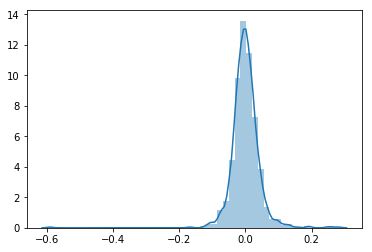

In [1639]:
res = y_train - y_train_pred
sns.distplot(res)

## Making Prediction

In [1640]:
# Creating X test new data frame after dropping variable from X
# Create list of numeric variable

num_vars = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath'
           ,'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF'
           ,'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']


#2. Fit the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Family,Normal,Partial,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
1436,1437,0.000000,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,...,0,1,0,1,0,0,0,0,0,0
57,58,0.235294,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,...,0,1,0,1,0,0,0,0,0,0
780,781,0.000000,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,...,0,1,0,1,0,0,0,0,0,0
382,383,0.235294,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,...,0,1,0,1,0,0,0,0,0,0
1170,1171,0.352941,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,...,0,1,0,1,0,0,0,0,0,0


In [1641]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1642]:
# Now lets use our model to make prediction

# add a constant
X_test_new = sm.add_constant(X_test)
X_test_new.head()

X_test_new.columns

Index(['const', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'Family', 'Normal', 'Partial', 'CompShg', 'Membran', 'Metal', 'Roll',
       'Tar&Grv', 'WdShake', 'WdShngl'],
      dtype='object', length=178)

In [1643]:
X_test_new = X_test_new.drop(['Id',
 'MSSubClass',
 'LotFrontage',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'FV',
 'RH',
 'RL',
 'RM',
 'Pave',
 'IR2',
 'IR3',
 'Reg',
 'HLS',
 'Low',
 'Lvl',
 'NoSeWa',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Mod',
 'Sev',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'Feedr',
 'Norm',
 'PosA',
 'PosN',
 'RRAe',
 'RRAn',
 'RRNe',
 'RRNn',
 '2fmCon',
 'Duplex',
 'Twnhs',
 'TwnhsE',
 '1.5Unf',
 '1Story',
 '2.5Fin',
 '2.5Unf',
 '2Story',
 'SFoyer',
 'SLvl',
 'Gable',
 'Gambrel',
 'Hip',
 'Mansard',
 'Shed',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing',
 'Brk Cmn',
 'CmentBd',
 'Other',
 'Wd Shng',
 'None',
 'Po',
 'PConc',
 'Slab',
 'Wood',
 'Mn',
 'No',
 'BLQ',
 'GLQ',
 'LwQ',
 'Rec',
 'Unf',
 'GasA',
 'GasW',
 'Grav',
 'Wall',
 'Y',
 'FuseF',
 'FuseP',
 'Mix',
 'SBrkr',
 'Maj2',
 'Min1',
 'Min2',
 'Typ',
 'Attchd',
 'Basment',
 'BuiltIn',
 'CarPort',
 'Detchd',
 'RFn',
 'P',
 'CWD',
 'Con',
 'ConLD',
 'ConLI',
 'ConLw',
 'New',
 'Oth',
 'WD',
 'AdjLand',
 'Alloca',
 'Family',
 'Normal',
 'Partial'],axis =1)
X_test_new.shape

(439, 21)

In [1644]:
X_test_new.columns

Index(['const', 'LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'PoolArea', 'Fa',
       'Gd', 'TA', 'OthW', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv',
       'WdShake', 'WdShngl'],
      dtype='object')

In [1645]:
X_test_new = X_test_new.drop(['const'],axis =1)
X_test_new.shape

(439, 20)

In [1646]:
#predict 
y_pred = lm.predict(X_test_new)

## R2 value

In [1647]:
r2_score(y_true = y_test, y_pred =y_pred)

-85.491144748295

Text(0, 0.5, 'y_pred')

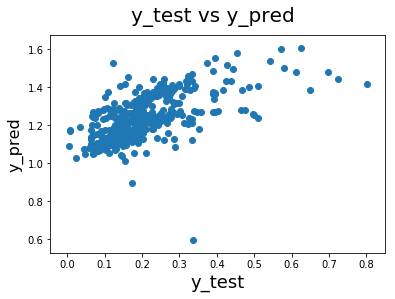

In [1648]:
# Plotting graph

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_pred',fontsize =16)

So from above r2 score is good for both train and test.

In [1649]:
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [1650]:
# k-fold CV (using all the 20 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores   

array([0.83981932, 0.66640043, 0.69558417, 0.45296107, 0.88133181])

In [1651]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores 

array([0.52409097, 0.46034359, 0.8590801 , 0.38714896, 0.4819322 ])

In [1652]:
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [1653]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00160988, -0.00477755, -0.00349707, -0.00549086, -0.00168477])

##  Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [1654]:
# number of features in X_train
len(X_train.columns)

177

In [1655]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1656]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.318403,0.105919,0.006,0.004899,1,{'n_features_to_select': 1},0.583038,0.148800,0.607515,0.602010,...,0.523988,0.190245,10,0.627919,0.416966,0.622369,0.623525,0.605461,0.579248,0.081500
1,1.289502,0.084682,0.000,0.000000,2,{'n_features_to_select': 2},0.617896,0.270505,0.603043,0.601587,...,0.554070,0.144340,4,0.629696,0.650123,0.637332,0.637625,0.619190,0.634793,0.010187
2,1.306002,0.027276,0.002,0.004000,3,{'n_features_to_select': 3},0.615669,0.268250,0.602884,0.601571,...,0.552332,0.144338,6,0.630774,0.650306,0.638110,0.637721,0.620605,0.635503,0.009748
3,1.254002,0.020591,0.004,0.004899,4,{'n_features_to_select': 4},0.615747,0.270178,0.602857,0.601825,...,0.552772,0.143597,5,0.630910,0.664282,0.638210,0.637802,0.620700,0.638381,0.014420
4,1.234002,0.020591,0.000,0.000000,5,{'n_features_to_select': 5},0.615747,0.554977,0.603110,0.601824,...,0.609705,0.037726,1,0.630915,0.771449,0.638291,0.637805,0.620869,0.659866,0.056146
5,1.274002,0.053516,0.000,0.000000,6,{'n_features_to_select': 6},0.615749,0.498833,0.603103,0.574245,...,0.592977,0.056922,2,0.630918,0.788776,0.638298,0.640623,0.620873,0.663898,0.062818
6,1.306502,0.042060,0.002,0.004000,7,{'n_features_to_select': 7},0.578480,0.495530,0.603098,0.568507,...,0.577432,0.048054,3,0.638311,0.791681,0.638302,0.645277,0.627818,0.668278,0.061953
7,1.378002,0.037095,0.000,0.000000,8,{'n_features_to_select': 8},0.577175,0.409382,0.603247,0.539318,...,0.541902,0.069320,7,0.721808,0.794092,0.645753,0.735414,0.719239,0.723261,0.047309
8,1.292002,0.055642,0.002,0.004000,9,{'n_features_to_select': 9},0.568213,0.417584,0.702863,0.470006,...,0.539288,0.097124,8,0.733951,0.798541,0.727070,0.757222,0.737446,0.750846,0.025868
9,1.256002,0.032000,0.004,0.004899,10,{'n_features_to_select': 10},0.514372,0.409853,0.716247,0.455032,...,0.526958,0.104858,9,0.750117,0.799260,0.748051,0.759194,0.739597,0.759244,0.020957


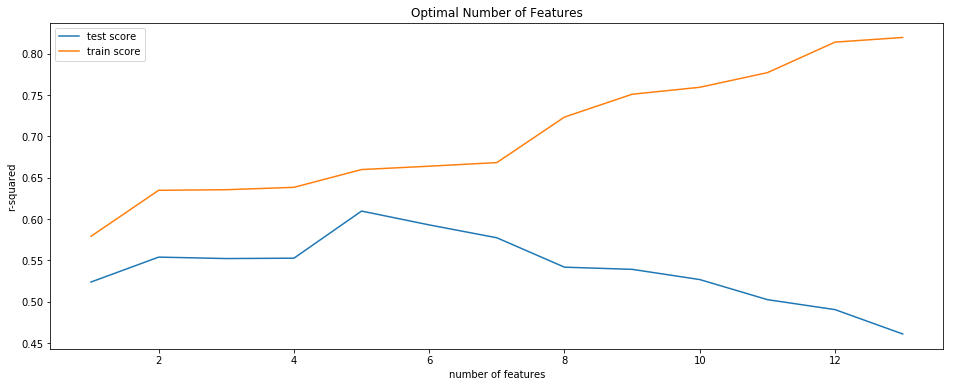

In [1657]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

from above graph 
1. looks like both train and test score is not matching.
2. teey got up upto 5 variable but when we added few more varibale then test score goes down.
3. train also went down when we add more variable which beacame overfit so as test data became overfit.
4. test data seems high variance and low bias and train data seems opposite

In [1658]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8785486859425886


## Ridge and Lasso Regression

## Ridge Regression

In [1659]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

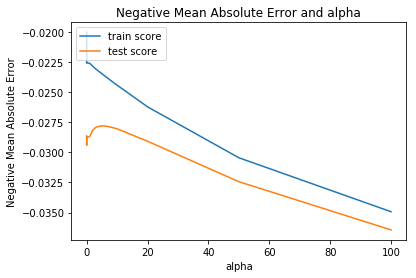

In [1660]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

1.looks like both train and test score is not matching.
2. test got up upto 5 variable but when we added few more varibale then test score goes down.
3. train also went down when we add more variable which beacame overfit so as test data became overfit.
4. test data seems high variance and low bias and train data seems opposite
5. both are coming down as negative so both are good here.


In [1661]:
alpha = 0.001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.21467003e-06, -3.80706955e-02,  1.62913881e-02,  1.11686027e-01,
        1.00647162e-01,  6.03321382e-02,  6.56570709e-02,  7.69688921e-03,
        3.00898253e-02,  1.53930723e-01,  9.00538798e-03,  3.22466896e-03,
        1.45596034e-01,  1.52848273e-01,  1.49665562e-01, -1.35813257e-02,
        1.84928812e-01,  1.74865307e-02, -1.30620737e-03, -1.27824573e-04,
       -5.67672756e-03, -4.81170388e-02, -4.89819858e-02,  2.21820856e-02,
        2.09883123e-02,  9.39583049e-05,  3.01786411e-02,  2.07453907e-02,
        1.14118245e-02,  5.78281638e-03,  7.50829728e-04,  3.75216134e-02,
        1.29945931e-02,  1.08537300e-01, -5.01768652e-03, -9.83706217e-03,
       -1.32267913e-03,  2.59936757e-02,  3.22567338e-02,  3.62675574e-02,
        3.15807470e-02,  4.82989592e-02,  3.98841684e-03,  1.72071570e-02,
        4.57095582e-03,  2.50054648e-02,  3.59355722e-03,  2.19911069e-02,
       -4.03328956e-02,  1.44556574e-02, -8.18093688e-03, -1.54078442e-02,
       -1.18666261e-03,  

## Lasso

In [1662]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1663]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054,0.008000,0.000,0.000,0.0001,{'alpha': 0.0001},-0.026215,-0.029343,-0.029414,-0.026359,...,-0.027607,0.001455,1,-0.024154,-0.020253,-0.022845,-0.024245,-0.024191,-0.023137,0.001535
1,0.012,0.004000,0.000,0.000,0.001,{'alpha': 0.001},-0.026447,-0.033224,-0.030250,-0.028365,...,-0.029989,0.002391,2,-0.029828,-0.027286,-0.028494,-0.029154,-0.029064,-0.028765,0.000852
2,0.008,0.004000,0.002,0.004,0.01,{'alpha': 0.01},-0.059432,-0.066419,-0.061575,-0.055347,...,-0.061449,0.003877,3,-0.062056,-0.059666,-0.060238,-0.061713,-0.060735,-0.060882,0.000892
3,0.006,0.004899,0.002,0.004,0.05,{'alpha': 0.05},-0.065820,-0.072515,-0.066963,-0.061718,...,-0.067510,0.003766,5,-0.068193,-0.065461,-0.067304,-0.068398,-0.067001,-0.067271,0.001046
4,0.008,0.004000,0.000,0.000,0.1,{'alpha': 0.1},-0.065950,-0.072267,-0.066813,-0.061652,...,-0.067480,0.003745,4,-0.068139,-0.065458,-0.067342,-0.068370,-0.066977,-0.067257,0.001033


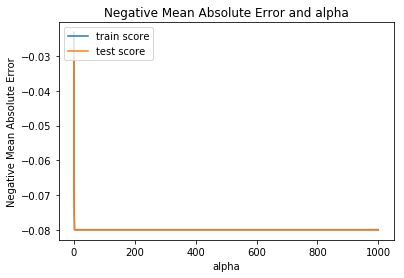

In [1664]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

1. looks like both train and test score is not matching.
2. train got up upto 5 variable but when we added few more varibale then test score goes down.
3. train also went down when we add more variable which beacame overfit so as test data became overfit.
4. test data seems high variance and low bias and train data seems opposite 
5. due to some negative cofficient it is coming as straight line.
6. When i removed those negative values it came to good position.


In [1665]:
alpha =0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1666]:
lasso.coef_

array([-2.51034097e-06, -3.06166288e-02,  0.00000000e+00,  0.00000000e+00,
        1.89728481e-01,  0.00000000e+00,  0.00000000e+00,  1.58487627e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.53326573e-01,  1.41406811e-02,  0.00000000e+00,  0.00000000e+00,
        5.10995072e-05,  0.00000000e+00, -0.00000000e+00,  5.72913394e-03,
        4.45852108e-02,  2.91045453e-04,  5.11932655e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.21259112e-03,
       -5.96598292e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -3.18260435e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.59076512e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [1667]:
from sklearn.metrics import r2_score

In [1668]:
y_train_pred = y_train_pred = lasso.predict(X_train)
train_score1 = r2_score(y_true = y_train, y_pred =y_train_pred)

In [1669]:
y_test_pred = y_test_pred = lasso.predict(X_test)
test_score1 = r2_score(y_true = y_test, y_pred =y_test_pred)

In [1670]:
print ("training score:", train_score1)
print ("test score: ", test_score1)

training score: 0.8116604664717125
test score:  0.801532829531359


In [1671]:
lasso_coff = np.count_nonzero(lasso.coef_)

In [1672]:
Ridge = Ridge()
Ridge.fit(X_train,y_train)
train_score=Ridge.score(X_train,y_train)
test_score=Ridge.score(X_test,y_test)

In [1673]:
ridge.coef_

array([ 1.21467003e-06, -3.80706955e-02,  1.62913881e-02,  1.11686027e-01,
        1.00647162e-01,  6.03321382e-02,  6.56570709e-02,  7.69688921e-03,
        3.00898253e-02,  1.53930723e-01,  9.00538798e-03,  3.22466896e-03,
        1.45596034e-01,  1.52848273e-01,  1.49665562e-01, -1.35813257e-02,
        1.84928812e-01,  1.74865307e-02, -1.30620737e-03, -1.27824573e-04,
       -5.67672756e-03, -4.81170388e-02, -4.89819858e-02,  2.21820856e-02,
        2.09883123e-02,  9.39583049e-05,  3.01786411e-02,  2.07453907e-02,
        1.14118245e-02,  5.78281638e-03,  7.50829728e-04,  3.75216134e-02,
        1.29945931e-02,  1.08537300e-01, -5.01768652e-03, -9.83706217e-03,
       -1.32267913e-03,  2.59936757e-02,  3.22567338e-02,  3.62675574e-02,
        3.15807470e-02,  4.82989592e-02,  3.98841684e-03,  1.72071570e-02,
        4.57095582e-03,  2.50054648e-02,  3.59355722e-03,  2.19911069e-02,
       -4.03328956e-02,  1.44556574e-02, -8.18093688e-03, -1.54078442e-02,
       -1.18666261e-03,  

In [1674]:
print ("training score:", train_score)
print ("test score: ", test_score)

training score: 0.885902184372664
test score:  0.8738219870611166


In [1675]:
np.count_nonzero(ridge.coef_)

174

In [1676]:
## LASSO COEFFICIENTS
final_las_lst=[]
for i in list(zip(lasso.coef_, X_train.columns)):
    if((i[0]!=0.0)|(i[0]!=-0.0)):
            final_las_lst.append(i)
    final_las_lst.sort(reverse=True)
    final_las_lst[:10] ## Top 10
    
    ## RIDGE COEFFICIENTS
    final_rdg_lst = list(zip(ridge.coef_, X_train.columns))
    final_rdg_lst.sort(reverse=True)
    print(final_rdg_lst[:10]) ## Top 10

[(0.9973578857973351, 'WdShngl'), (0.9608684472758211, 'Membran'), (0.900411176644456, 'Metal'), (0.8851377677626112, 'Roll'), (0.883663780625589, 'Tar&Grv'), (0.8770157583399135, 'CompShg'), (0.8582599506830024, 'WdShake'), (0.18492881247569945, 'GrLivArea'), (0.1539307226822899, 'BsmtFinSF1'), (0.1528482726855043, '1stFlrSF')]
[(0.9973578857973351, 'WdShngl'), (0.9608684472758211, 'Membran'), (0.900411176644456, 'Metal'), (0.8851377677626112, 'Roll'), (0.883663780625589, 'Tar&Grv'), (0.8770157583399135, 'CompShg'), (0.8582599506830024, 'WdShake'), (0.18492881247569945, 'GrLivArea'), (0.1539307226822899, 'BsmtFinSF1'), (0.1528482726855043, '1stFlrSF')]
[(0.9973578857973351, 'WdShngl'), (0.9608684472758211, 'Membran'), (0.900411176644456, 'Metal'), (0.8851377677626112, 'Roll'), (0.883663780625589, 'Tar&Grv'), (0.8770157583399135, 'CompShg'), (0.8582599506830024, 'WdShake'), (0.18492881247569945, 'GrLivArea'), (0.1539307226822899, 'BsmtFinSF1'), (0.1528482726855043, '1stFlrSF')]
[(0.997

## From above few run below is the conclusion for Ridge.
## Top 10 variable which is impacting to saleprice.

1. WdShngl
2. Membran
3. Metal
4. Roll
5. Tar&Grv
6. CompShg
7. WdShake
8. GrLivArea
9. BsmtFinSF1
10. 1stFlrSF

## From above few run below is the conclusion for lasso.
## Top 10 variable which is impacting to saleprice.

1. GrLivArea
2. OverallQual
3. NoRidge
4. GarageCars
5. Fireplaces
6. NridgHt
7. YearRemodAdd
8. New
9. BsmtFullBath
10. GLQ